In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon, ks_2samp
import matplotlib.pyplot as plt
from glob import glob
import joypy
from PIL import Image
from io import BytesIO
import numpy as np
import warnings

warnings.simplefilter("ignore")

gender_colormap = {"female": "hotpink", "male": "skyblue", "baseline": "green"}


def load_and_add_model(path):
    data = pd.read_csv(path)
    data["model"] = path.split("/")[-1].split(".")[0]
    return data


df = pd.read_csv("../data/processed/Claude_3_Haiku.csv")

lexical diversity
WilcoxonResult(statistic=np.float64(2197.0), pvalue=np.float64(7.920224863101476e-11))
reading difficulty
WilcoxonResult(statistic=np.float64(2300.0), pvalue=np.float64(2.1141928505377975e-09))
analytical
WilcoxonResult(statistic=np.float64(nan), pvalue=np.float64(nan))
self references
WilcoxonResult(statistic=np.float64(4028.0), pvalue=np.float64(0.002164169582296189))
certainty
WilcoxonResult(statistic=np.float64(0.0), pvalue=np.float64(1.1087892528281638e-09))
emotionality
WilcoxonResult(statistic=np.float64(4075.5), pvalue=np.float64(0.004164756788838717))


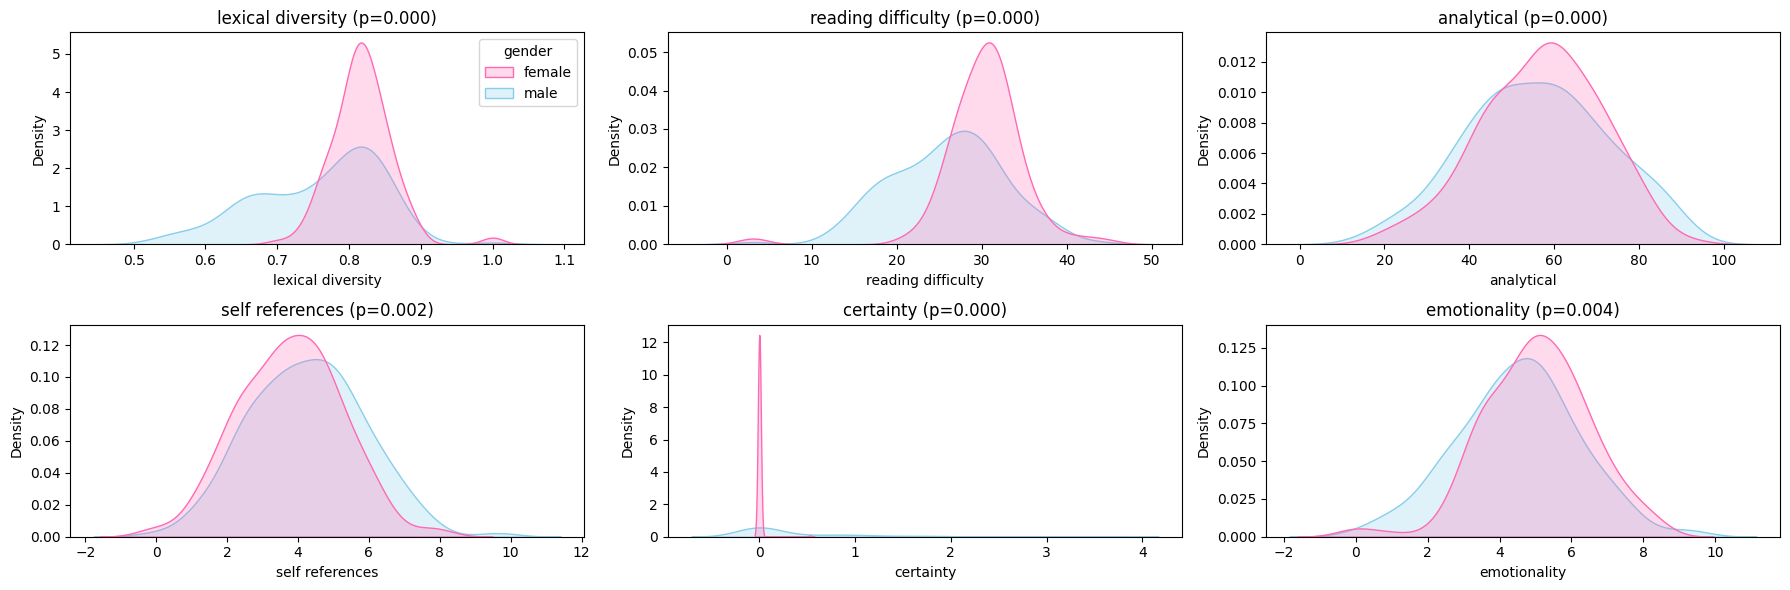

In [2]:
emotional = df[df["type"] == "emotional"].reset_index(drop=True)

fig, ax = plt.subplots(2, 3, figsize=(18, 6))


for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    print(measure)
    wilcoxon_result = wilcoxon(
        emotional[emotional["gender"] == "male"][measure],
        emotional[emotional["gender"] == "female"][measure],
    )
    print(wilcoxon_result)
    sns.kdeplot(
        emotional, x=measure, hue="gender", fill=True, palette=gender_colormap, ax=ax[i // 3, i % 3]
    )
    p = wilcoxon_result.pvalue if not np.isnan(wilcoxon_result.pvalue) else 0
    ax[i // 3, i % 3].set_title(f"{measure} (p={p:.3f})")
    if i != 0:
        ax[i // 3, i % 3].legend_.remove()
fig.tight_layout()
plt.show()

lexical diversity
reading difficulty
analytical
self references
certainty
emotionality


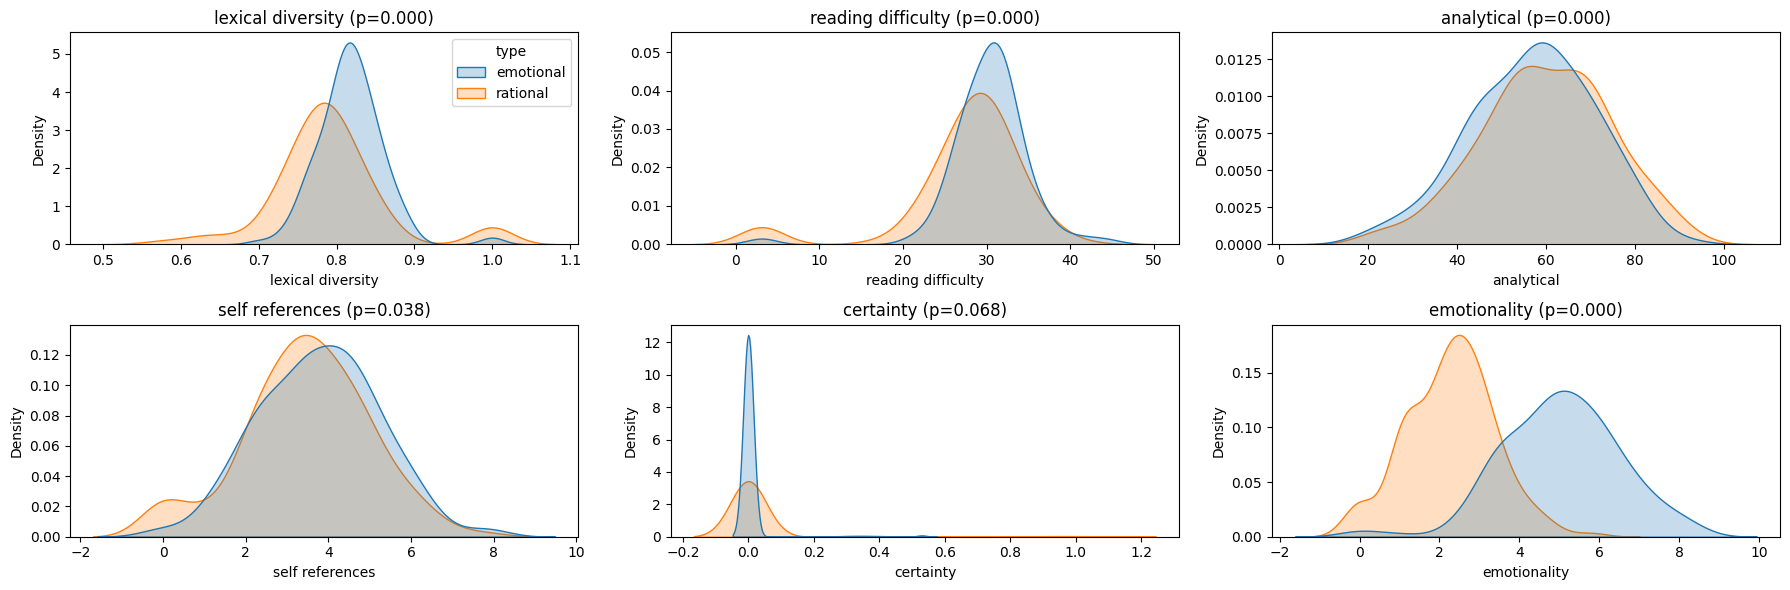

In [3]:
female = df[df["gender"] == "female"].reset_index(drop=True)

fig, ax = plt.subplots(2, 3, figsize=(18, 6))
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    print(measure)
    wilcoxon_result = wilcoxon(
        female[female["type"] == "rational"][measure],
        female[female["type"] == "emotional"][measure],
    )
    sns.kdeplot(female, x=measure, hue="type", ax=ax[i // 3, i % 3], fill=True)
    p = wilcoxon_result.pvalue if not np.isnan(wilcoxon_result.pvalue) else 0
    ax[i // 3, i % 3].set_title(f"{measure} (p={p:.3f})")
    if i != 0:
        ax[i // 3, i % 3].legend_.remove()
fig.tight_layout()
plt.show()

lexical diversity
reading difficulty
analytical
self references
certainty
emotionality


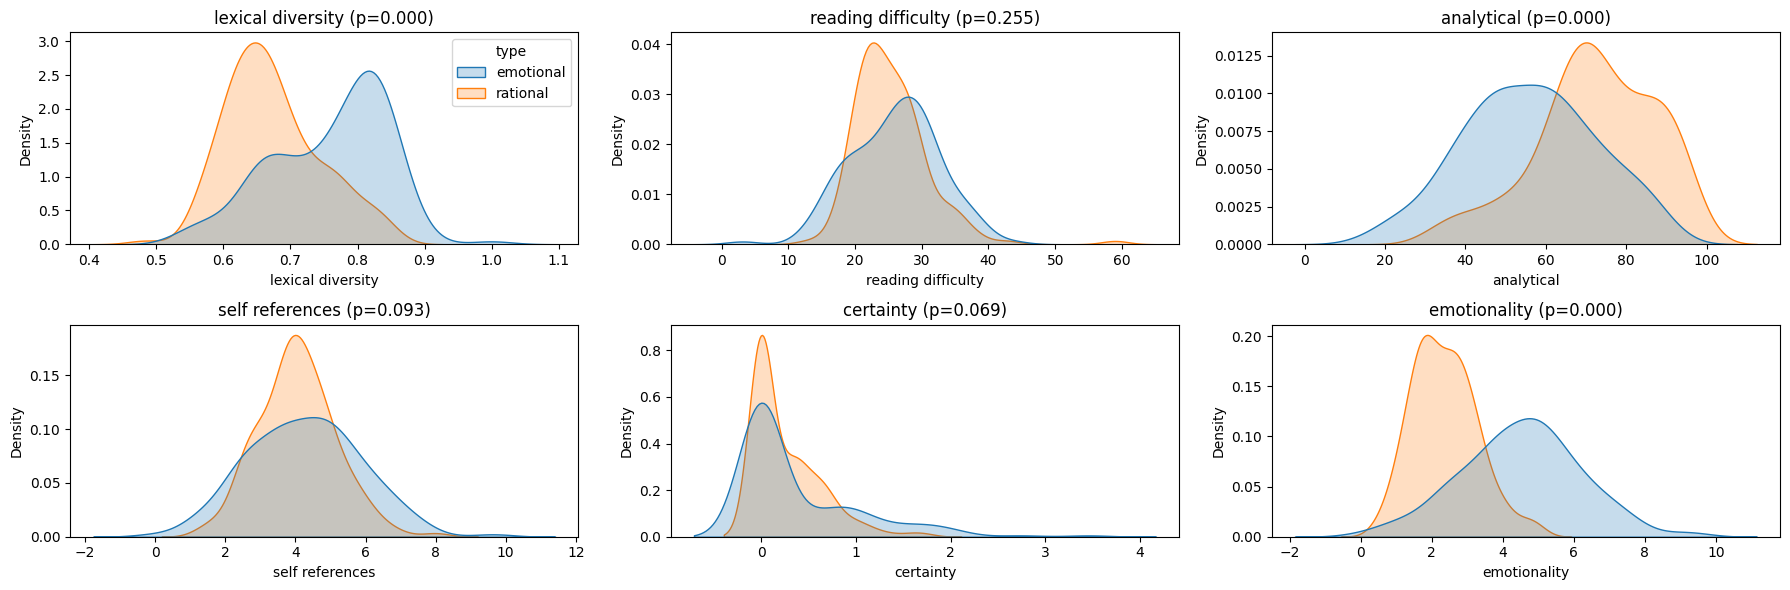

In [4]:
female = df[df["gender"] == "male"].reset_index(drop=True)

fig, ax = plt.subplots(2, 3, figsize=(18, 6))
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    print(measure)
    wilcoxon_result = wilcoxon(
        female[female["type"] == "rational"][measure],
        female[female["type"] == "emotional"][measure],
    )
    sns.kdeplot(female, x=measure, hue="type", ax=ax[i // 3, i % 3], fill=True)
    p = wilcoxon_result.pvalue if not np.isnan(wilcoxon_result.pvalue) else 0
    ax[i // 3, i % 3].set_title(f"{measure} (p={p:.3f})")
    if i != 0:
        ax[i // 3, i % 3].legend_.remove()
fig.tight_layout()
plt.show()

# wnioski:
- baseline różni się pod wieloma względami od poszczególnych typów zapytań
- odpowiedź baselineowa modelu do kobiet i mężczyzn jest bardziej podobna do racjonalnej niż emocjonalnej
- llm próbując emocjonalnie przekonać kobiety używa trudniejszych słów niż w stosunku do mężczyzn


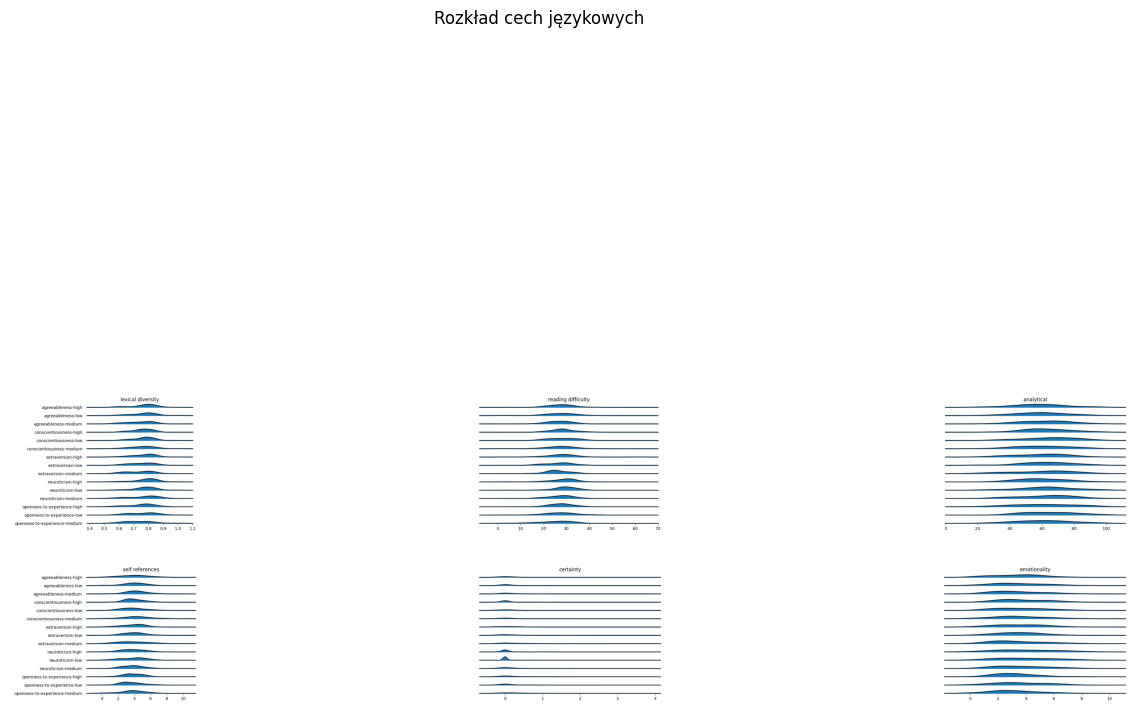

In [5]:
df["temp"] = df["trait"].str.replace(" ", "-") + "-" + df["level"]

images = []
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    fig, axes = joypy.joyplot(df, by="temp", column=measure)
    if i % 3 != 0:
        for a in axes:
            a.set_yticklabels([])
            a.set_yticks([])
    plt.title(measure)
    buf = BytesIO()
    plt.tight_layout(pad=1.0)
    plt.savefig(buf, format="png")
    buf.seek(0)
    img = Image.open(buf)
    images.append(img)
    plt.close()

fig, ax = plt.subplots(2, 3, figsize=(24, 8))
plt.suptitle("Rozkład cech językowych")
for a, img in zip(ax.flatten(), images):
    a.imshow(img)
    a.axis("off")
plt.subplots_adjust(wspace=-0.5, top=0.5)
plt.show()

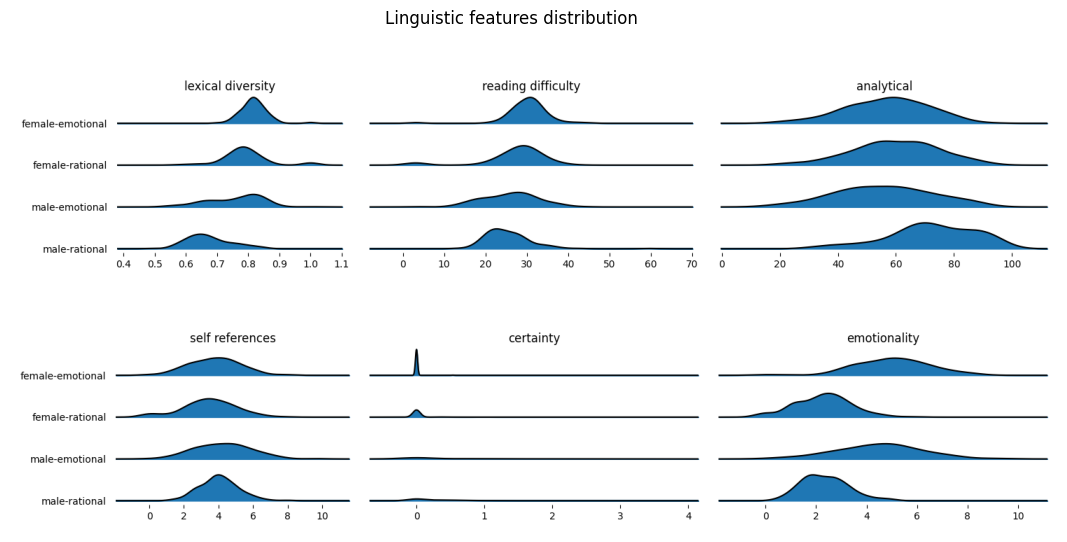

In [6]:
df["temp"] = df["gender"] + "-" + df["type"]
images = []
for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    fig, axes = joypy.joyplot(df, by="temp", column=measure, figsize=(5, 3))
    if i % 3 != 0:
        for a in axes:
            a.set_yticklabels([])
            a.set_yticks([])
    plt.title(measure)
    buf = BytesIO()
    plt.tight_layout()
    plt.savefig(buf, format="png")
    buf.seek(0)
    img = Image.open(buf)
    images.append(img)
    plt.close()
fig, ax = plt.subplots(2, 3, figsize=(18, 6))
plt.suptitle("Linguistic features distribution")
for a, img in zip(ax.flatten(), images):
    a.imshow(img)
    a.axis("off")
plt.subplots_adjust(wspace=-0.5)
plt.show()

In [7]:
NAMES_MAPPING = {
    "lexical diversity": "Lexical diversity",
    "reading difficulty": "Reading difficulty",
    "analytical": "Analytical / Narrative",
    "self references": "Self references",
    "certainty": "Certainty",
    "emotionality": "Emotionality",
}

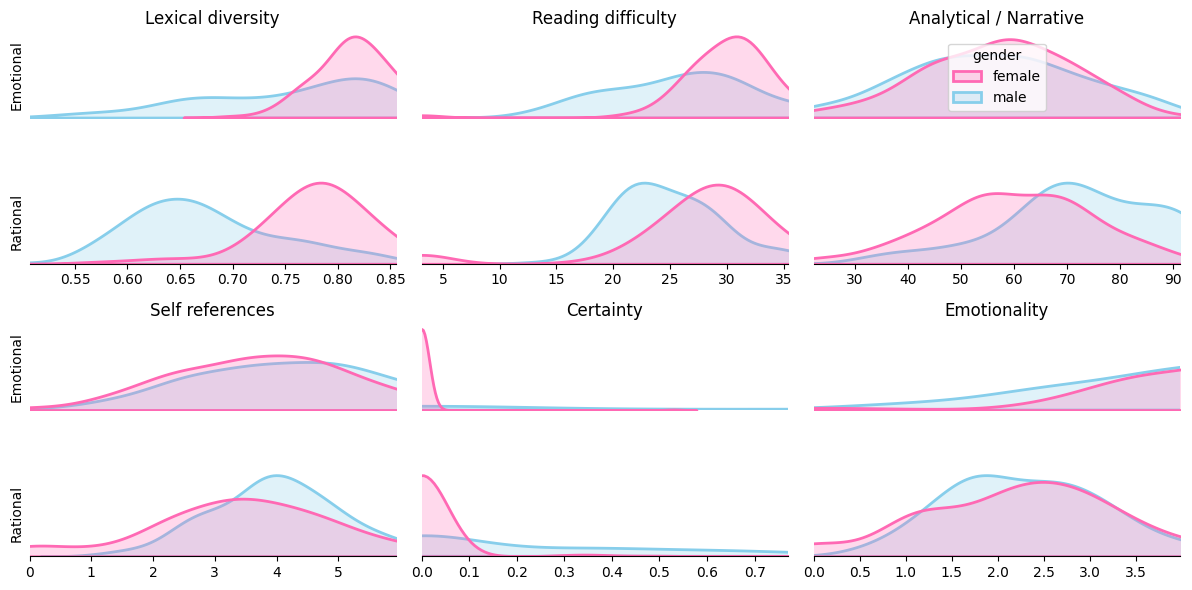

In [12]:
def disable_spines(ax, remove_bottom=True):
    for spine in ["top", "right", "left"]:
        ax.spines[spine].set_visible(False)
    if remove_bottom:
        ax.spines["bottom"].set_visible(False)


fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(12, 6))

for i, measure in enumerate(
    (
        "lexical diversity",
        "reading difficulty",
        "analytical",
        "self references",
        "certainty",
        "emotionality",
    )
):
    upper_plot_ax = ax[2 * (i // 3), i % 3]
    lower_plot_ax = ax[2 * (i // 3) + 1, i % 3]
    disable_spines(upper_plot_ax)
    disable_spines(lower_plot_ax, False)
    emotional_df = df.loc[df.type == "emotional"].reset_index(drop=True)
    rational_df = df.loc[df.type == "rational"].reset_index(drop=True)
    upper_plot_ax.set_title(f"{NAMES_MAPPING[measure]}")
    sns.kdeplot(
        data=emotional_df,
        x=measure,
        ax=upper_plot_ax,
        hue="gender",
        fill=True,
        palette=gender_colormap,
        linewidth=2,
    )
    sns.kdeplot(
        data=rational_df,
        x=measure,
        ax=lower_plot_ax,
        hue="gender",
        fill=True,
        palette=gender_colormap,
        linewidth=2,
    )
    lower_plot_ax.set_xlim(
        rational_df[measure].quantile(0.001), rational_df[measure].quantile(0.95)
    )
    upper_plot_ax.set_xlim(lower_plot_ax.get_xlim())
    upper_plot_ax.set_ylim([0, max(lower_plot_ax.get_ylim()[1], upper_plot_ax.get_ylim()[1])])
    upper_plot_ax.set_xticks([])
    upper_plot_ax.set_xlabel("")
    lower_plot_ax.set_xlabel("")
    lower_plot_ax.legend().remove()
    if i != 2:
        upper_plot_ax.legend().remove()
    upper_plot_ax.set_ylabel("")
    lower_plot_ax.set_ylabel("")
    upper_plot_ax.set_yticks([])
    lower_plot_ax.set_yticks([])
ax[0][0].set_ylabel("Emotional")
ax[1][0].set_ylabel("Rational")
ax[2][0].set_ylabel("Emotional")
ax[3][0].set_ylabel("Rational")
fig.tight_layout()